In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne, glob
import eeglabio
import pandas as pd

%matplotlib inline

In [51]:
path = 'C:\\Users\\anita\\OneDrive\\Bureaublad\\Anita\'s stuff II\\Tilburg university\\Brainihacks\\EngagementStudy\\CleanSetFiles\\RandomClean'
os.chdir(path)

In [17]:
data = mne.io.read_raw_eeglab('1Adaptive_Clean.set')


Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\Adaptive\1Adaptive_Clean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\2944475966.py:1: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab('1Adaptive_Clean.set')
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\2944475966.py:1: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab('1Adaptive_Clean.set')
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\2944475966.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab('1Adaptive_Clean.set')


In [18]:
print(data.ch_names)

['Fz', 'F3', 'Cz', 'F4', 'Pz', 'C3', 'Oz', 'C4', 'AdaptiveRandom', 'FirstSecond', 'Participant']


In [19]:
d = {'Fz': data[0][0][0], 'F3': data[1][0][0], 'Cz': data[2][0][0], 'F4': data[3][0][0], 'Pz': data[4][0][0],
     'C3': data[5][0][0], 'Oz': data[6][0][0], 'C4': data[7][0][0]}

df = pd.DataFrame(d)

In [20]:
df



,Fz,F3,Cz,F4,Pz,C3,Oz,C4
0,-0.745369,3.839414,72.099440,39.915996,-10.861428,14.168317,4.757535,0.017539
1,-0.961274,4.267098,72.023920,38.573204,-10.452202,14.093481,5.680151,1.983018
2,-0.842726,5.349151,72.130376,37.390256,-10.204308,14.071094,7.710798,5.470377
3,0.157931,7.243006,72.788272,37.356420,-10.216404,14.172132,10.289900,9.527016
4,2.250161,9.967072,74.123984,38.495804,-10.365649,14.357589,12.638545,13.279177
...,...,...,...,...,...,...,...,...
138357,-9.872820,-2.121839,-6.310038,-11.375951,-12.713873,12.442694,-21.084656,-12.216551
138358,-10.617758,-1.018943,-5.562849,-9.825840,-11.680382,13.721793,-18.546742,-8.462695
138359,-9.130679,0.191533,-3.952903,-6.843225,-10.197091,15.134178,-16.720966,-5.530647
138360,-5.918026,1.317605,-1.942602,-3.228733,-8.663550,16.112850,-16.426963,-4.840267


In [41]:
def getEEGIndex(channel):
    epochs = []
    buffer = []
    nperseg = 512 # Length of each segment
    noverlap = 256 # Overlap between segments
    window = signal.hamming(nperseg) # Window function
    
    #sample freq = 256 Hz
    #10 seconds = 2560 samples per epoch
    count = 0
    for i in range(len(channel)):
         
        buffer.append(channel[i])
        
        if count == 2560:
            
            freqs, psd = signal.welch(buffer, Fs, window=window, nperseg=nperseg, noverlap=noverlap)

            alpha = np.trapz(psd[(freqs >= 8) & (freqs < 12)], x=freqs[(freqs >= 8) & (freqs < 12)])
            beta = np.trapz(psd[(freqs >= 13) & (freqs < 30)], x=freqs[(freqs >= 13) & (freqs < 30)]) 
            theta  = np.trapz(psd[(freqs >= 4) & (freqs < 8)], x=freqs[(freqs >= 4) & (freqs < 8)])
            
            EEGIndex = beta/(alpha+theta)
            epochs.append(EEGIndex)
            count = 0
            buffer = []
            
        count += 1
        
        
        
    return epochs



In [32]:
def getEngagement(participant_df):
    channels = []
    for i in participant_df.columns:
        #print(participant_df[i])
        channels.append(getEEGIndex(participant_df[i])) 
        
    EEG_Engagement = pd.DataFrame(channels)
    EEG_Engagement = EEG_Engagement.T
    
    dcols = list(participant_df.columns)
    EEG_Engagement = EEG_Engagement.set_axis(dcols, axis=1, inplace=False)
    
    return EEG_Engagement



In [42]:
EEG_Engagement = pd.DataFrame(getEngagement(df))
EEG_Engagement

,Fz,F3,Cz,F4,Pz,C3,Oz,C4
0,0.912238,1.227246,1.210055,0.985579,0.957701,1.036110,1.302162,1.037855
1,0.822308,0.692615,0.720034,0.700590,0.437755,0.704781,0.692162,0.755128
2,0.964714,1.468779,1.386257,1.189744,1.749586,1.277907,2.617354,2.162822
3,0.999669,1.550231,1.344694,1.175888,1.322639,1.227083,1.353329,1.114678
4,1.131814,1.116796,1.272751,1.138669,1.024429,0.860246,1.235099,1.379541
5,0.599038,0.667862,0.579206,0.590228,0.700216,0.903253,0.822998,0.705832
6,1.256308,1.542150,1.763278,2.085674,2.273757,2.169489,2.185361,2.388112
7,0.939394,1.016882,1.099980,1.333467,1.469034,1.210723,1.803245,1.836940
8,0.799191,0.572265,0.646903,0.422547,0.631835,0.509880,0.672981,0.653034
9,0.868900,0.992646,1.190362,1.060075,1.587063,1.104123,1.463759,1.626289


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(EEG_Engagement)

EEG_Engagement[:] = scaler.transform(EEG_Engagement)
EEG_Engagement

,Fz,F3,Cz,F4,Pz,C3,Oz,C4
0,0.246649,1.000000,0.610035,0.064863,0.483834,0.609912,0.877809,0.678265
1,0.232900,0.875265,0.604166,0.064779,0.544649,0.607855,0.895263,0.679850
2,0.229377,0.874422,0.603025,0.064787,0.478394,0.610321,0.881128,0.678314
3,0.239443,0.873185,0.602735,0.064755,0.470742,0.614828,0.879030,0.678552
4,0.206657,0.876749,0.609712,0.064572,0.484176,0.611335,0.881436,0.679149
...,...,...,...,...,...,...,...,...
613,0.235781,0.806828,0.600950,0.064452,0.477080,0.608463,0.880630,0.677628
614,0.239705,0.875047,0.606426,0.032128,0.478476,0.609727,0.881007,0.678224
615,0.240334,0.875419,0.606157,0.064297,0.486112,0.611830,0.881617,0.678678
616,0.261594,0.880022,0.613785,0.064654,0.507787,0.604986,0.886117,0.683078


In [40]:
EEG_Engagement['Frontal'] = EEG_Engagement[["Fz", "F3", "F4"]].mean(axis = 1)
EEG_Engagement['Central'] = EEG_Engagement[["Cz", "C3", "C4"]].mean(axis = 1)
EEG_Engagement['Parietal'] = EEG_Engagement[["Pz", "Oz"]].mean(axis = 1)
EEG_Engagement['Total'] = EEG_Engagement.mean(axis = 1)
EEG_Engagement

,Fz,F3,Cz,F4,Pz,C3,Oz,C4,Frontal,Central,Parietal,Total
0,0.408274,0.419112,0.415280,0.355272,0.489971,0.546644,0.582284,0.576433,0.394219,0.512786,0.536128,0.476037
1,0.385609,0.409317,0.463424,0.407722,0.381907,0.486111,0.687522,0.704639,0.400883,0.551391,0.534714,0.492112
2,0.472194,0.973886,0.979323,0.770078,1.298667,0.881005,1.616150,1.465521,0.738719,1.108616,1.457408,1.069233
3,0.442262,0.595825,0.664238,0.652926,0.660607,0.526170,0.678316,0.623637,0.563671,0.604681,0.669461,0.607436
4,0.591232,0.821341,0.931664,0.799575,0.658044,0.699343,1.134065,1.011275,0.737382,0.880761,0.896055,0.832794
5,0.431781,0.473130,0.452840,0.357672,0.470891,0.632410,0.527768,0.421009,0.420861,0.502086,0.499329,0.471798
6,0.833725,1.052304,1.092725,1.177317,1.226927,1.145455,1.262781,1.440301,1.021115,1.226160,1.244854,1.156697
7,0.449085,0.533513,0.532552,0.547113,0.568463,0.513210,0.611973,0.605619,0.509904,0.550460,0.590218,0.546555
8,0.348743,0.267737,0.306252,0.208329,0.294592,0.241463,0.337929,0.388212,0.274936,0.311975,0.316261,0.299675
9,0.503334,0.621150,0.799659,0.588276,0.987101,0.558480,0.875410,1.040392,0.570920,0.799511,0.931256,0.752317


In [35]:
EEG_Engagement.to_csv('AdaptiveP1Engagement_Raw') 

Text(0.5, 1.0, 'EEG Engagement Index Different Electrodes')

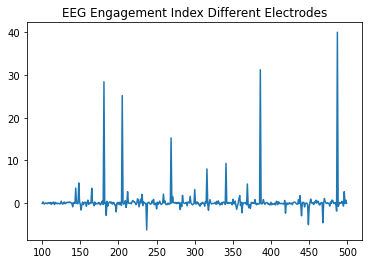

In [268]:
#plt.plot(EEG_Engagement['Frontal'])
#plt.plot(EEG_Engagement['Central'])
#plt.plot(EEG_Engagement['Parietal'])
plt.plot(EEG_Engagement['Total'][100:500])
plt.title('EEG Engagement Index Different Electrodes')


In [47]:
def createCSV(num, scaling):
    fname = str(num +'RandomClean.set')
    
    ##Read from .set files
    data = mne.io.read_raw_eeglab(fname)
    d = {'Fz': data[0][0][0], 'F3': data[1][0][0], 'Cz': data[2][0][0], 'F4': data[3][0][0], 'Pz': data[4][0][0],
         'C3': data[5][0][0], 'Oz': data[6][0][0], 'C4': data[7][0][0]}

    df = pd.DataFrame(d)
    EEG_Engagement = pd.DataFrame(getEngagement(df))

    if scaling == True:
        #Scaling yes/no
        scaler = MinMaxScaler().fit(EEG_Engagement)

        EEG_Engagement[:] = scaler.transform(EEG_Engagement)
    
    EEG_Engagement['Frontal'] = EEG_Engagement[["Fz", "F3", "F4"]].mean(axis = 1)
    EEG_Engagement['Central'] = EEG_Engagement[["Cz", "C3", "C4"]].mean(axis = 1)
    EEG_Engagement['Parietal'] = EEG_Engagement[["Pz", "Oz"]].mean(axis = 1)
    EEG_Engagement['Total'] = EEG_Engagement.mean(axis = 1)
        
    fname_out = str('P'+ num + 'Engagement_Raw.csv')
    path_out = str('C:\\Users\\anita\\OneDrive\\Bureaublad\\Anita\'s stuff II\\Tilburg university\\Brainihacks\\EngagementStudy\\CleanSetFiles\\EngagementCSV\\Random' + fname_out)
    EEG_Engagement.to_csv(path_out) 
    print(str("File" + num + "processed..."))
    return 0


In [52]:
flist = []
for i in os.listdir():
    if '.set' in i:
        flist.append(i)       
print(flist)
print(len(flist))

['10RandomClean.set', '11RandomClean.set', '12RandomClean.set', '13RandomClean.set', '14RandomClean.set', '15RandomClean.set', '16RandomClean.set', '17RandomClean.set', '18RandomClean.set', '19RandomClean.set', '1RandomClean.set', '20RandomClean.set', '21RandomClean.set', '22RandomClean.set', '23RandomClean.set', '24RandomClean.set', '25RandomClean.set', '26RandomClean.set', '27RandomClean.set', '28RandomClean.set', '29RandomClean.set', '30RandomClean.set', '31RandomClean.set', '32RandomClean.set', '33RandomClean.set', '34RandomClean.set', '35RandomClean.set', '36RandomClean.set', '37RandomClean.set', '38RandomClean.set', '39RandomClean.set', '3RandomClean.set', '40RandomClean.set', '4RandomClean.set', '5RandomClean.set', '6RandomClean.set', '7RandomClean.set', '8RandomClean.set', '9RandomClean.set']
39


In [45]:
def only_numerics(seq):
    seq_type= type(seq)
    return seq_type().join(filter(seq_type.isdigit, seq))

In [53]:
for i in range(len(flist)):
    num = flist[i][0:2]
    num = only_numerics(num)
    
    createCSV(num, scaling = False)

Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\10Random_Clean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File10processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\11RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File11processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\12RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File12processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\13RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File13processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\14RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File14processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\15RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File15processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\16RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File16processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\17RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File17processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\18RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File18processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\19RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (19Random.fdt) is incorrect, the file name must have changed on disk, using the correct file name (19RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File19processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\1RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (1Random_Clean.fdt) is incorrect, the file name must have changed on disk, using the correct file name (1RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  d

File1processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\20RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (20Random.fdt) is incorrect, the file name must have changed on disk, using the correct file name (20RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data 

File20processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\21RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (21Random.fdt) is incorrect, the file name must have changed on disk, using the correct file name (21RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data 

File21processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\22RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (22Random.fdt) is incorrect, the file name must have changed on disk, using the correct file name (22RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File22processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\23RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (23Random.fdt) is incorrect, the file name must have changed on disk, using the correct file name (23RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File23processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\24RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (24Random.fdt) is incorrect, the file name must have changed on disk, using the correct file name (24RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data 

File24processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\25RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (25Random.fdt) is incorrect, the file name must have changed on disk, using the correct file name (25RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data 

File25processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\26RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (26Random.fdt) is incorrect, the file name must have changed on disk, using the correct file name (26RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File26processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\27RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (27Random.fdt) is incorrect, the file name must have changed on disk, using the correct file name (27RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data 

File27processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\28RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (27Random.fdt) is incorrect, the file name must have changed on disk, using the correct file name (28RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data 

File28processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\29RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (29Random.fdt) is incorrect, the file name must have changed on disk, using the correct file name (29RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File29processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\30RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (30Random.fdt) is incorrect, the file name must have changed on disk, using the correct file name (30RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data 

File30processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\31RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File31processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\32RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File32processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\33RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File33processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\34RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File34processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\35RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File35processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\36RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File36processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\37RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File37processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\38RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File38processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\39RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File39processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\3RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (3Random_Clean.fdt) is incorrect, the file name must have changed on disk, using the correct file name (3RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  d

File3processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\40RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File40processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\4RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (4Random_Clean_test.fdt) is incorrect, the file name must have changed on disk, using the correct file name (4RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File4processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\5RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (5Random_Clean.fdt) is incorrect, the file name must have changed on disk, using the correct file name (5RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File5processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\6RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (6Random_Clean.fdt) is incorrect, the file name must have changed on disk, using the correct file name (6RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)


File6processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\7RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (7Random_Clean.fdt) is incorrect, the file name must have changed on disk, using the correct file name (7RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Limited 3 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  d

File7processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\8RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (8Random_Clean.fdt) is incorrect, the file name must have changed on disk, using the correct file name (8RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)


File8processed...
Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\RandomClean\9RandomClean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: Data file name in EEG.data (9Random_Clean.fdt) is incorrect, the file name must have changed on disk, using the correct file name (9RandomClean.fdt).
  data = mne.io.read_raw_eeglab(fname)
C:\Users\anita\AppData\Local\Temp\ipykernel_17776\725810499.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(fname)


File9processed...
